In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\satis\\OneDrive\\Desktop\\Data Science\\python\\Dataset\\global_population_growth_2024.csv")

df.head()

,City,Country,Population_2023,Growth_Rate (%),Population_2024
0,Los Angeles,USA,26836512,1.308574,27187687
1,Shanghai,China,11673774,1.568945,11856929
2,Cairo,Egypt,22201723,4.871278,23283230
3,Mumbai,India,11440139,1.314396,11590507
4,Los Angeles,USA,3792427,4.344733,3957197


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             1000 non-null   object 
 1   Country          1000 non-null   object 
 2   Population_2023  1000 non-null   int64  
 3   Growth_Rate (%)  1000 non-null   float64
 4   Population_2024  1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population_2023,1000.0,1.555745e+07,8.188922e+06,1.076218e+06,8.767388e+06,1.538409e+07,2.265558e+07,2.999429e+07
Growth_Rate (%),1000.0,2.738825e+00,1.296754e+00,5.070430e-01,1.606459e+00,2.782955e+00,3.819846e+00,4.997362e+00
Population_2024,1000.0,1.598217e+07,8.415373e+06,1.082482e+06,8.914246e+06,1.589204e+07,2.322489e+07,3.122415e+07


<Axes: >

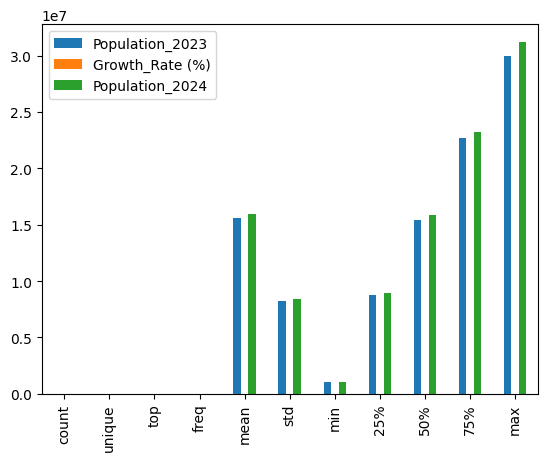

In [5]:
df.describe(include='all').plot(kind='bar')

In [6]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined


numeric_df = df.select_dtypes(include=[float, int])


correlation_matrix = numeric_df.corr()
 
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')

fig.show()

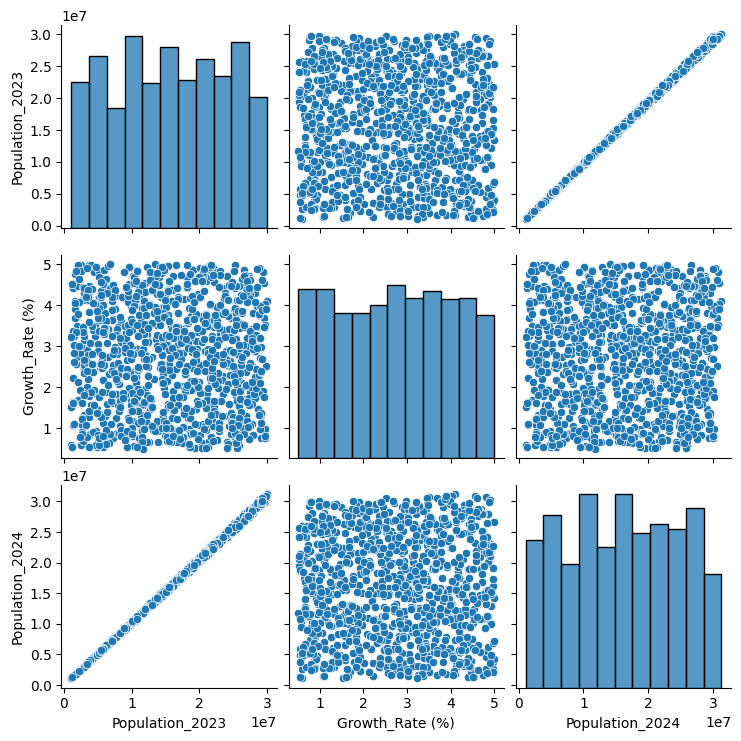

In [7]:
import seaborn as sns

# Select features with correlation above 0.8
high_corr_features = correlation_matrix.columns[(correlation_matrix > 0.8).any()].tolist()

# Create a pairplot for the selected features
sns.pairplot(numeric_df[high_corr_features])
plt.show()


In [8]:
df.isna().sum()

City               0
Country            0
Population_2023    0
Growth_Rate (%)    0
Population_2024    0
dtype: int64

In [9]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['City', 'Country', 'Population_2023', 'Growth_Rate (%)', 'Population_2024']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
               
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                 
                xaxis={'categoryorder': 'total descending'}
               

            )
            
            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

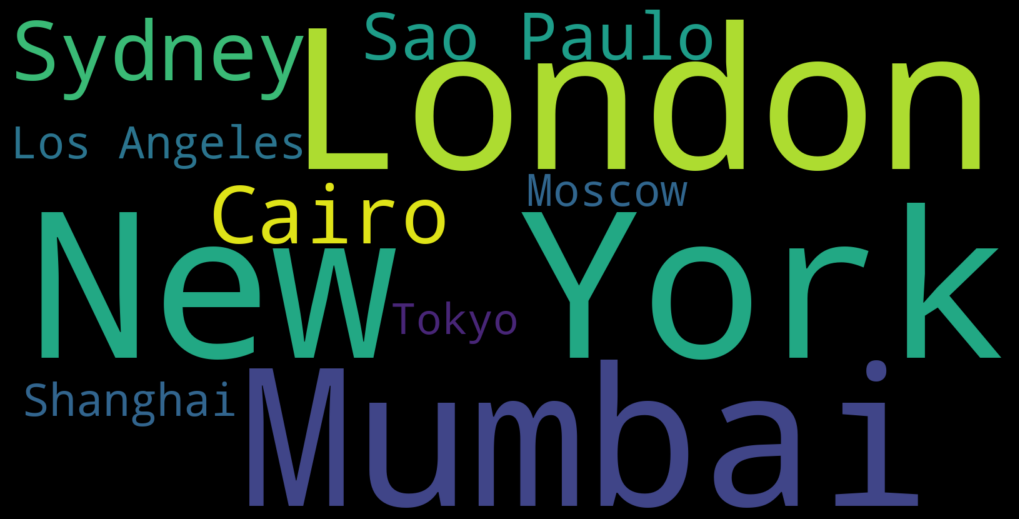

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["City"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()